## Read and plot near-real-time Wave Glider data

first cut by Tom, 10/18/2021  
Updated for IOP1, 10/9/2022

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory

In [2]:
%matplotlib inline
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(14,17,21)-2.5
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 41)
    levels = np.linspace(13,18,11)

    

Payload 2 Table 1 has met, ctd variables  
Payload 2 Table 2 has RDI variables

In [4]:
# List of WGs
input_list = ['WHOI-ASL22','WHOI-ASL32','SV3-1043','STOKES', 'PLANCK', 'PASCAL', 'KELVIN', 'CARSON']
url_prefix = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/'
tab1_postfix = '_PLD2_TAB1.nc#mode=bytes'
tab2_postfix = '_PLD2_TAB2.nc#mode=bytes'
WG_list = ['WHOI22','WHOI32','WHOI43','STOKES', 'PLANCK', 'PASCAL', 'KELVIN', 'CARSON']

In [51]:
# Read in Payload 2 Tables 1 and 2 from all WG
n=0
for WG in WG_list:
    input_WG=input_list[n]
    print(input_WG)
    url1 = url_prefix+input_WG+tab1_postfix
    varstr = 'ds1_'+WG
    locals()[varstr]=xr.open_dataset(url1,decode_times=True)    
    url2 = url_prefix+input_WG+tab2_postfix
    varstr = 'ds2_'+WG
    locals()[varstr]=xr.open_dataset(url2,drop_variables=['z'],decode_times=True)
    n=n+1
    print(url1)

WHOI-ASL22
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/WHOI-ASL22_PLD2_TAB1.nc#mode=bytes
WHOI-ASL32
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/WHOI-ASL32_PLD2_TAB1.nc#mode=bytes
SV3-1043
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/SV3-1043_PLD2_TAB1.nc#mode=bytes
STOKES
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/STOKES_PLD2_TAB1.nc#mode=bytes
PLANCK
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/PLANCK_PLD2_TAB1.nc#mode=bytes
PASCAL
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/PASCAL_PLD2_TAB1.nc#mode=bytes
KELVIN
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/KELVIN_PLD2_TAB1.nc#mode=bytes
CARSON
http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/CARSON_PLD2_TAB1.nc#mode=bytes


In [6]:
# Now we can access these in a loop using syntax like:
eval('ds1_'+WG).time

<xarray.DataArray 'time' (time: 1123)>
array(['2022-09-22T20:16:00.000000000', '2022-09-22T20:30:56.000000000',
       '2022-09-22T20:45:52.000000000', ..., '2022-10-09T21:00:48.000000000',
       '2022-10-09T21:15:44.000000000', '2022-10-09T21:30:40.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-09-22T20:16:00 ... 2022-10-09T21:30:40
Attributes:
    axis:           T
    long_name:      Time of waveglider measurement
    standard_name:  time

In [ ]:
eval('ds1_'+WG_list[7]).time

In [ ]:
WG_list[7]

In [7]:
eval('ds1_'+WG_list[0])

<xarray.Dataset>
Dimensions:                      (time: 838)
Coordinates:
  * time                         (time) datetime64[ns] 2022-09-22T02:31:28 .....
Data variables: (12/71)
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    ...                           ...
    sig_temperature_Avg          (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_ins_file               (time) float32 ...
    index_psp_file               (time) float32 ...
    index_adcp_file              (time) float32 ...
    index_sig_file               (time) float32 ...
Attributes:
    Name:                 WHOI-ASL22_PLD2_TAB1
    wms_title:            WHOI-ASL22_PLD2_TAB1
    title:                S-MODE IOP1 2022 Waveglider WHOI-ASL22 real-time da...
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2022-10-09 17:45Z Downloaded real-time data from WG...
    time_coverage_start:  2022-09-21T22:31:00
    time_coverage_end:    2022-10-09T17:31:00

In [45]:
def plot_WG_SST(V,n):
    extent = [xmin, xmax, ymin, ymax]
    ds = eval('ds1_'+WG_list[n])
    sst = ds.uctd_temp_Avg.values.astype(np.ndarray)
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.set_title('WG SST',size = 10.)

    plt.scatter(ds.longitude_1hz_Avg, ds.latitude_1hz_Avg,s=10,c=sst, cmap=plt.get_cmap('turbo'),vmin=V[0],vmax=V[1],transform=ccrs.PlateCarree())
    '''
    plt.colorbar()
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k');
    '''

WHOI32 failed
PLANCK failed
KELVIN failed
CARSON failed


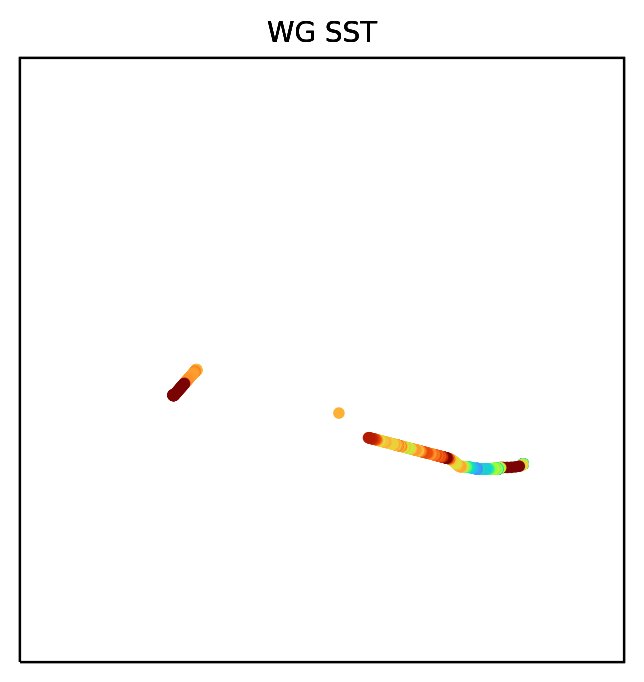

In [50]:
fig = plt.figure()
V=[14,18]
n=0
extent = [xmin, xmax, ymin, ymax]

for n in range(8):
    try:
        plot_WG_SST(V,n)
    except:
        print(WG_list[n]+' failed')

In [48]:
n

4

In [ ]:
type(ds.uctd_temp_Avg.values))

In [33]:
np.shape(ds.uctd_temp_Avg.values.astype(np.ndarray))

(838,)

In [38]:
'ds1_'+WG_list[n]

'ds1_WHOI32'

In [36]:
ds = eval('ds1_'+WG_list[n])

In [39]:
eval('ds1_'+WG_list[n])

RuntimeError: NetCDF: HDF error

<xarray.Dataset>
Dimensions:                      (time: 1704)
Coordinates:
  * time                         (time) datetime64[ns] 2022-09-22T02:31:28 .....
Data variables: (12/71)
    year                         (time) float32 2.022e+03 ... 2.022e+03
    day                          (time) float32 264.0 264.0 ... 282.0 282.0
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    ...                           ...
    sig_temperature_Avg          (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_ins_file               (time) float32 ...
    index_psp_file               (time) float32 ...
    index_adcp_file              (time) float32 ...
    index_sig_file               (time) float32 ...
Attributes:
    Name:                 WHOI-ASL32_PLD2_TAB1
    wms_title:            WHOI-ASL32_PLD2_TAB1
    tit

In [ ]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('WG SST',size = 10.)

plt.scatter(ds.longitude_1hz_Avg, ds.latitude_1hz_Avg,s=10,c=ds.uctd_temp_Avg.values, cmap=plt.get_cmap('turbo'),vmin=V[0],vmax=V[1],transform=ccrs.PlateCarree())
plt.colorbar()
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k');

In [ ]:
n

In [43]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/WHOI-ASL32_PLD2_TAB1.nc#mode=bytes'
ds_payload2_table1 = xr.open_dataset(url)

In [44]:
ds_payload2_table1

RuntimeError: NetCDF: HDF error

<xarray.Dataset>
Dimensions:                      (time: 1704)
Coordinates:
  * time                         (time) datetime64[ns] 2022-09-22T02:31:28 .....
Data variables: (12/71)
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    ...                           ...
    sig_temperature_Avg          (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_ins_file               (time) float32 ...
    index_psp_file               (time) float32 ...
    index_adcp_file              (time) float32 ...
    index_sig_file               (time) float32 ...
Attributes:
    Name:                 WHOI-ASL32_PLD2_TAB1
    wms_title:            WHOI-ASL32_PLD2_TAB1
    title:                S-MODE IOP1 2022 Waveglid

## Plot some health diagnostics for monitoring
Around 1200 UTC on 10/20/2021, a wave broke the lashings on the WGs, and this is a real-time effort to assess the status of the instruments

The data file of most interest at the moment is ```ds_payload2_table1```

In [ ]:
ds = ds_payload2_table1

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
'''
daystr=ds.time.dt.day.astype(str).values[0]
monstr=ds.time.dt.month.astype(str).values[0]
yrstr=ds.time.dt.year.astype(str).values[0]
day_str = monstr+'-'+daystr+'-'+yrstr
'''
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M").values
ax.set_title(day_str+' UTC', size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.STATES, zorder=3, edgecolor='black')
ax.plot(ds.longitude_1hz_Avg,ds.latitude_1hz_Avg,transform=ccrs.PlateCarree())
ax.plot(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1),'ko',transform=ccrs.PlateCarree())
ax.text(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1), 'last_time', fontsize=6, transform=ccrs.PlateCarree())
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,fraction = 0.022,extend='both')
# cb.set_label('SST [$\circ$C]',fontsize = 10)
functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -123.75
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_foo_WG_pos_' + day_str + '.' +plotfiletype,**savefig_args)
